## MMC - L6 - Kacper Marchlewicz - 310195

# Model Isinga
Model Isinga to siatkowy układ oddziałujących wzajemnie cząstek (spinów).
<br>
Zespół mikrokanoniczny - opisuje izolowane od otoczenia układy zamknięte, w których liczba cząsteczek N, objętość V oraz energia E są stałe. Symulacja w tym zespole polega na wprowadzeniu do układu dodatkowego stopnia swobody zwanego "duszkiem", który porusza się po układzie i może wymieniać energię z obecnymi w nim cząsteczkami.
<br>
Zespół kanoniczny - przyjmuje się, że spin jest odwracany z pewnym prawdopodobieństwem zależnym od temperatury.

# Zadanie 1
W pliku ising_main.cpp przygotowano następującą funckję do odpowiedniego uruchomienia symulacji i zapsu danych do pliku tekstowego:

In [1]:
'''
void zadanie1(string filename, int E_start, int E_end, int L, int step){
	// plik tekstowy
	std::ofstream file;
	file.open(filename);
	for(int e=E_start; e<=E_end; e+=step){
		// symulacja modelu
		ModelIsinga ising(L, e);
		ising.doprowadzenie_do_stanu_rownowagi(1000);
		ising.zliczanie_srednich(1000);
		// zapisanie do pliku w jednej linii
		file << e << " " << L << " " << ising.podaj_srednia_energie_ukladu() << " ";
		file << ising.podaj_srednia_energie_duszka() << " " << ising.podaj_srednia_magnetyzacje() << " ";
		file << ising.podaj_temperature() << std::endl;
	}
	// zamknięcie pliku
	file.close();
}
'''

'\nvoid zadanie1(string filename, int E_start, int E_end, int L, int step){\n\t// plik tekstowy\n\tstd::ofstream file;\n\tfile.open(filename);\n\tfor(int e=E_start; e<=E_end; e+=step){\n\t\t// symulacja modelu\n\t\tModelIsinga ising(L, e);\n\t\tising.doprowadzenie_do_stanu_rownowagi(1000);\n\t\tising.zliczanie_srednich(1000);\n\t\t// zapisanie do pliku w jednej linii\n\t\tfile << e << " " << L << " " << ising.podaj_srednia_energie_ukladu() << " ";\n\t\tfile << ising.podaj_srednia_energie_duszka() << " " << ising.podaj_srednia_magnetyzacje() << " ";\n\t\tfile << ising.podaj_temperature() << std::endl;\n\t}\n\t// zamknięcie pliku\n\tfile.close();\n}\n'

Przygotowano następujący kod do pobrania danych z plików i wyświetlenia ich na wykresach:

In [2]:
from matplotlib import pyplot as plt
import numpy as np


def plot_from_file_z1(filename):
    val, L, E_mean, E_ghost, M_mean, T_mean = np.loadtxt(filename, unpack=True)
    # wykresy
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    # mag od temp
    axs[0].plot(T_mean, M_mean)
    axs[0].set_xlabel('Temperatura')
    axs[0].set_ylabel('Magnetyzacja')
    axs[0].set_title('Średnia magnetyzacja od temperatury')
    # energ od temp
    axs[1].plot(T_mean, E_mean)
    axs[1].set_xlabel('Temperatura')
    axs[1].set_ylabel('Energia układu')
    axs[1].set_title('Średnia energia układu od temperatury')
    # pokaz
    plt.tight_layout()
    plt.show()

def plot_from_file_z2(filename):
    val, L, E_mean, M_mean = np.loadtxt(filename, unpack=True)
    # wykresy
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    # mag od temp
    axs[0].plot(val, M_mean)
    axs[0].set_xlabel('Temperatura')
    axs[0].set_ylabel('Magnetyzacja')
    axs[0].set_title('Średnia magnetyzacja od temperatury')
    # energ od temp
    axs[1].plot(val, E_mean)
    axs[1].set_xlabel('Temperatura')
    axs[1].set_ylabel('Energia układu')
    axs[1].set_title('Średnia energia układu od temperatury')
    # pokaz
    plt.tight_layout()
    plt.show()

def compare_from_files(filename1, filename2):
    val1, L1, E_mean1, E_ghost1, M_mean1, T_mean1 = np.loadtxt(filename1, unpack=True)
    val2, L2, E_mean2, M_mean2 = np.loadtxt(filename2, unpack=True)
    # wykresy
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    # mag od temp
    axs[0].plot(T_mean1, M_mean1, label='mikrokanoniczny')
    axs[0].plot(val2, M_mean2, label='kanoniczny')
    axs[0].set_xlabel('Temperatura')
    axs[0].set_ylabel('Magnetyzacja')
    axs[0].set_title('Średnia magnetyzacja od temperatury')
    axs[0].legend(loc="upper right")
    # energ od temp
    axs[1].plot(T_mean1, E_mean1, label='mikrokanoniczny')
    axs[1].plot(val2, E_mean2, label='kanoniczny')
    axs[1].set_xlabel('Temperatura')
    axs[1].set_ylabel('Energia układu')
    axs[1].set_title('Średnia energia układu od temperatury')
    axs[1].legend(loc="lower right")
    # pokaz
    plt.tight_layout()
    plt.show()

Następnie wyświetlono dane dla trzech symulacji zgodnie z danymi z polecenia:

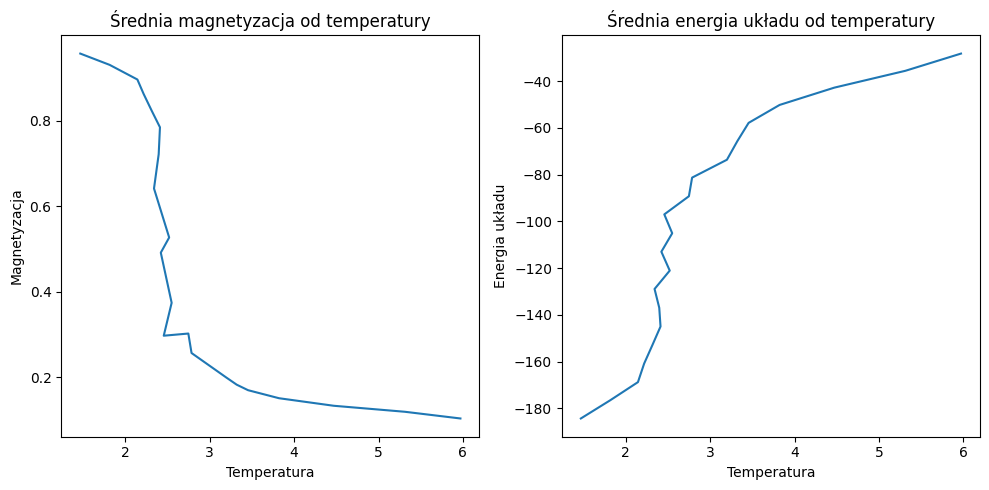

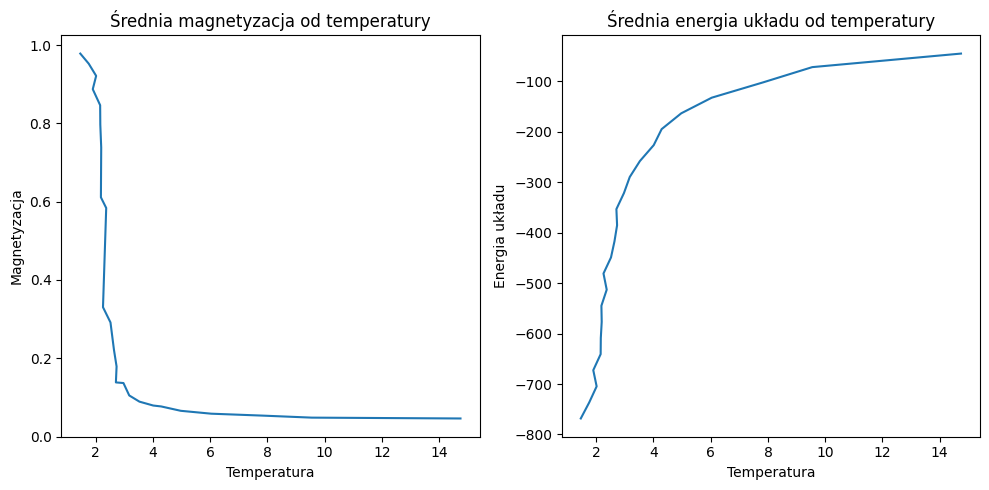

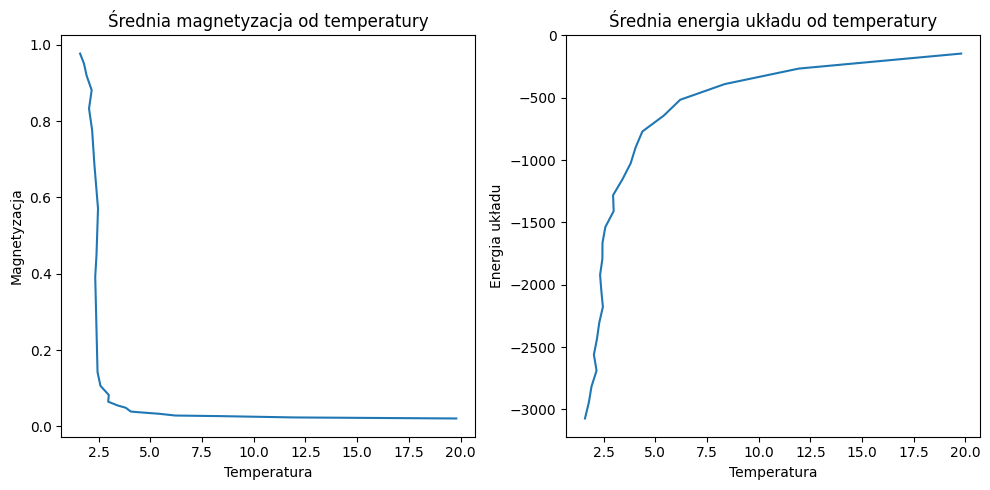

In [3]:
plot_from_file_z1("./zad1_1.txt")
plot_from_file_z1("./zad1_2.txt")
plot_from_file_z1("./zad1_3.txt")

Około temeratury 3 stopni następuje przejście fazowe, czyli nagły spadek średniej magnetyzacji i wzrost średniej energii układu.

# Zadanie 2
Należało zmodyfikować podany kod w celu umożliwienia symulacji w zespole kanonicznym. W układzie kanonicznym zadawana jest temperatura, nie energia przekazywana układowi. Z tego powodu dodano dodatkowy konstruktor, który jako drugi argument przyjmuje liczbę typu float - temperaturę.

Następnie zmodyfikowano funckję "sprobuj_odwrocic_spin_losowego_atomu() w pliku model_isinga.cpp:

In [4]:
'''
void ModelIsinga::sprobuj_odwrocic_spin_losowego_atomu() 
{
	int i = generator.losuj_wspolrzedna();
	int j = generator.losuj_wspolrzedna();
	int dE = deltaE(i, j);

	// mikrokanoniczny
	if(rodzaj==false){
		if (dE <= energia_duszka) 
		{				
			siatka[i][j] = -siatka[i][j];
			energia_duszka -= dE;
			energia_poczatkowa_ukladu  += dE;			
			magnetyzacja += 2*siatka[i][j];
		}
	}
	// kanoniczny
	if(rodzaj==true){
		// warunek z prawdopodobieńswa
		float p = exp(-dE / (temperatura_docelowa_ukladu)); 
		float l = generator.losuj_z_zakresu_0_1();
		// albo jest ujemne albo spełnione prawd
		if (dE <= 0 || l <= p) 
		{				
			siatka[i][j] = -siatka[i][j];
			energia_poczatkowa_ukladu  += dE;			
			magnetyzacja += 2*siatka[i][j];
		}
	}
}
'''

'\nvoid ModelIsinga::sprobuj_odwrocic_spin_losowego_atomu() \n{\n\tint i = generator.losuj_wspolrzedna();\n\tint j = generator.losuj_wspolrzedna();\n\tint dE = deltaE(i, j);\n\n\t// mikrokanoniczny\n\tif(rodzaj==false){\n\t\tif (dE <= energia_duszka) \n\t\t{\t\t\t\t\n\t\t\tsiatka[i][j] = -siatka[i][j];\n\t\t\tenergia_duszka -= dE;\n\t\t\tenergia_poczatkowa_ukladu  += dE;\t\t\t\n\t\t\tmagnetyzacja += 2*siatka[i][j];\n\t\t}\n\t}\n\t// kanoniczny\n\tif(rodzaj==true){\n\t\t// warunek z prawdopodobieńswa\n\t\tfloat p = exp(-dE / (temperatura_docelowa_ukladu)); \n\t\tfloat l = generator.losuj_z_zakresu_0_1();\n\t\t// albo jest ujemne albo spełnione prawd\n\t\tif (dE <= 0 || l <= p) \n\t\t{\t\t\t\t\n\t\t\tsiatka[i][j] = -siatka[i][j];\n\t\t\tenergia_poczatkowa_ukladu  += dE;\t\t\t\n\t\t\tmagnetyzacja += 2*siatka[i][j];\n\t\t}\n\t}\n}\n'

Do odpowiedniego zapisu danych w pliku teskstowym w ising_main.cpp utworzono następującą funkcję:

In [ ]:
'''
void zadanie2(string filename, float T_start, float T_end, int L, float step){
	// plik tekstowy
	std::ofstream file;
	file.open(filename);
	// najpierw gęsto
	for(float t=T_start; t<=3.0; t+=step/5.0){
		// symulacja modelu
		ModelIsinga ising(L, t);
		ising.doprowadzenie_do_stanu_rownowagi(1000);
		ising.zliczanie_srednich(1000);
		// zapisanie do pliku w jednej linii
		file << t << " " << L << " " << ising.podaj_srednia_energie_ukladu() << " ";
		file << ising.podaj_srednia_magnetyzacje() << std::endl;
	}
	// potem normalnie
	for(float t=3.0; t<=T_end; t+=step){
		// symulacja modelu
		ModelIsinga ising(L, t);
		ising.doprowadzenie_do_stanu_rownowagi(1000);
		ising.zliczanie_srednich(1000);
		// zapisanie do pliku w jednej linii
		file << t << " " << L << " " << ising.podaj_srednia_energie_ukladu() << " ";
		file << ising.podaj_srednia_magnetyzacje() << std::endl;
	}
	// zamknięcie pliku
	file.close();
}
'''

Następnie przedstawiono wykresy dla 3 konfiguracji symulacji:

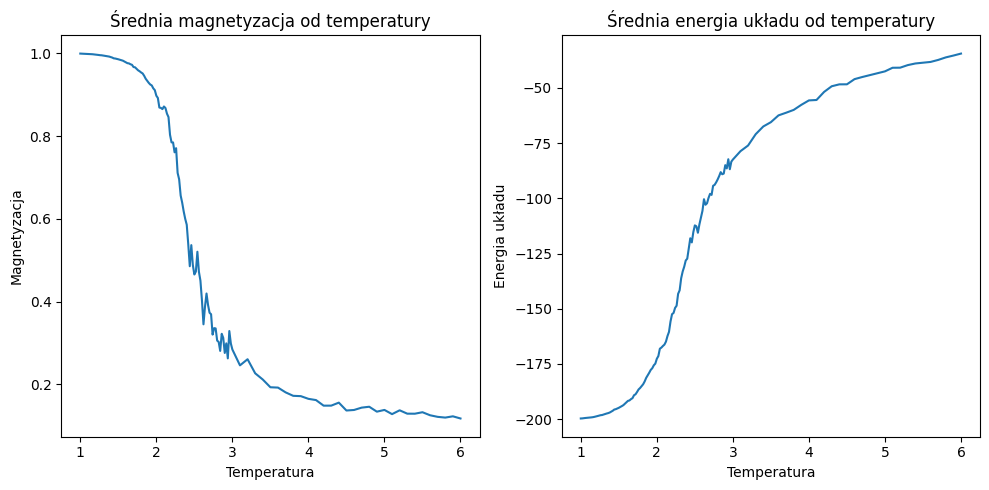

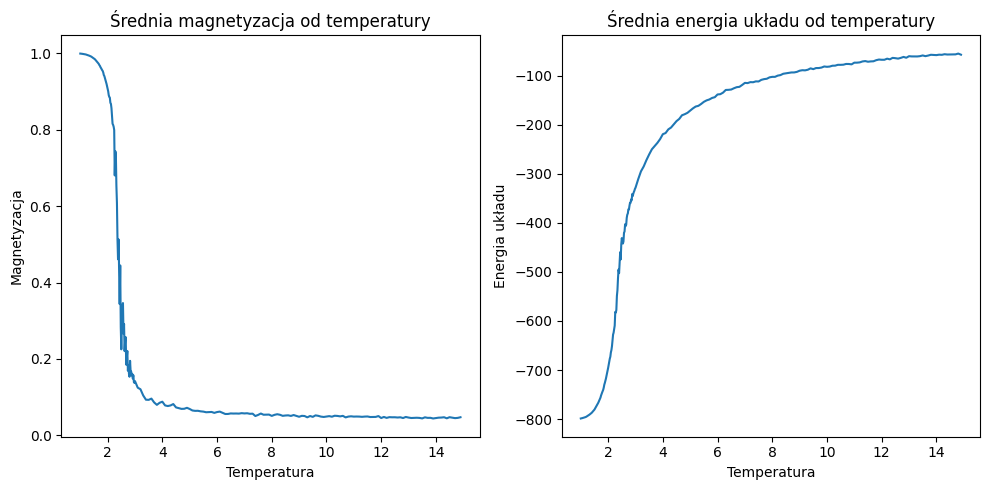

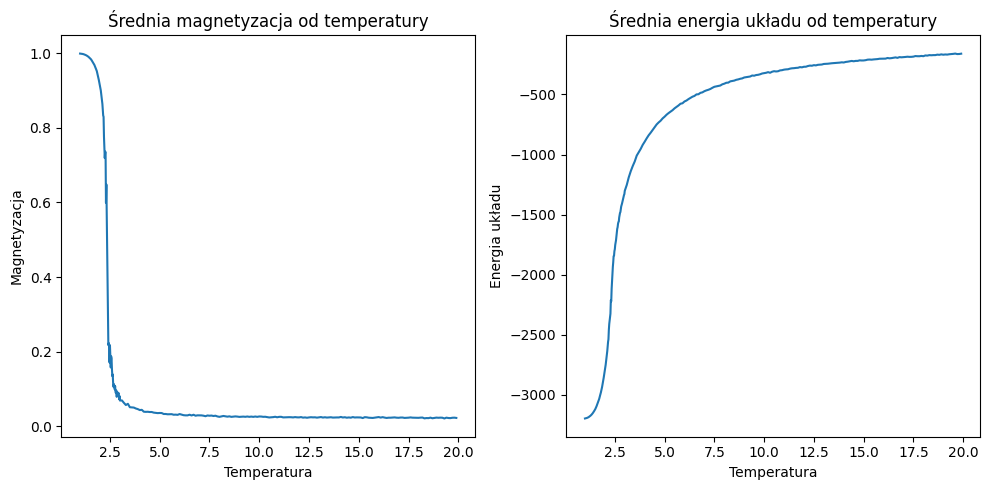

In [5]:
plot_from_file_z2("./zad2_1.txt")
plot_from_file_z2("./zad2_2.txt")
plot_from_file_z2("./zad2_3.txt")

Wykresy są bardzo podobne do układu mikrokanonicznego, ale można zaobserować że są gładsze, co wynika z częstszego próbkowania.

Porównano ze sobą działanie zespołu mikrokanonicznego i kanonicznego:

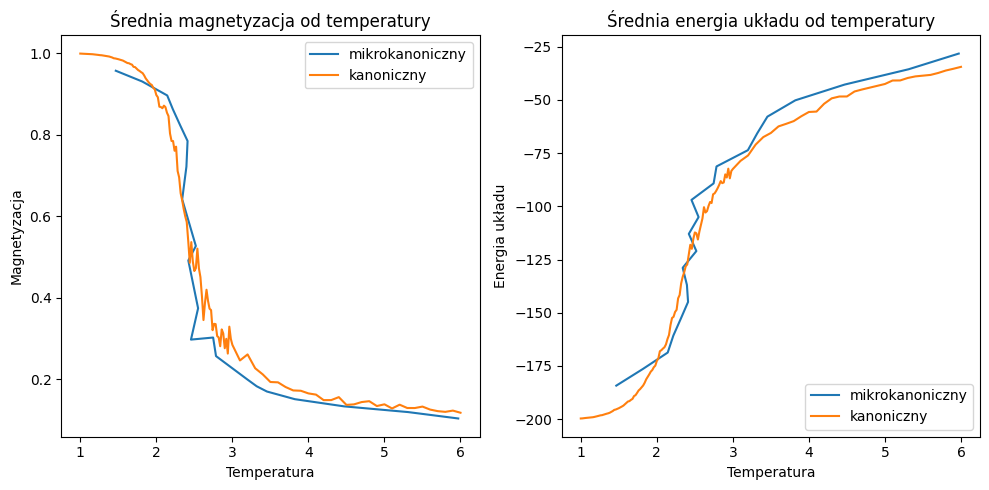

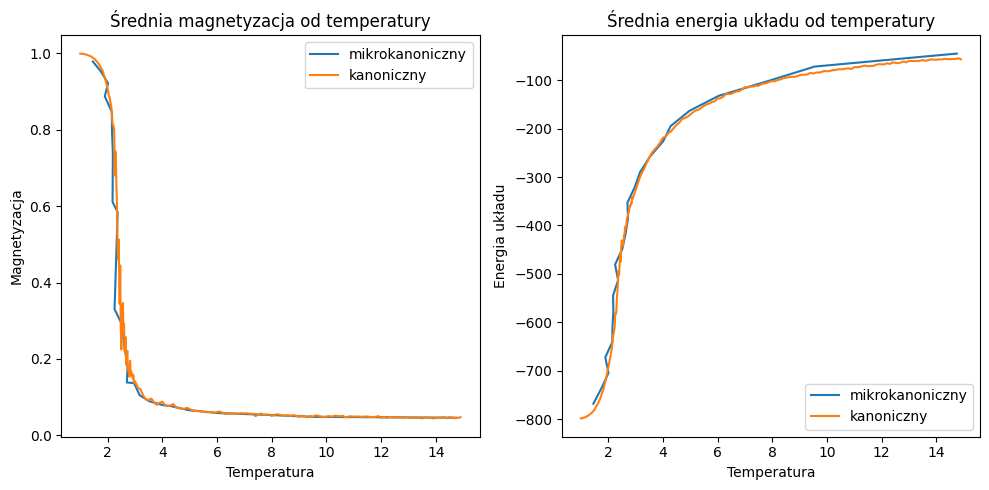

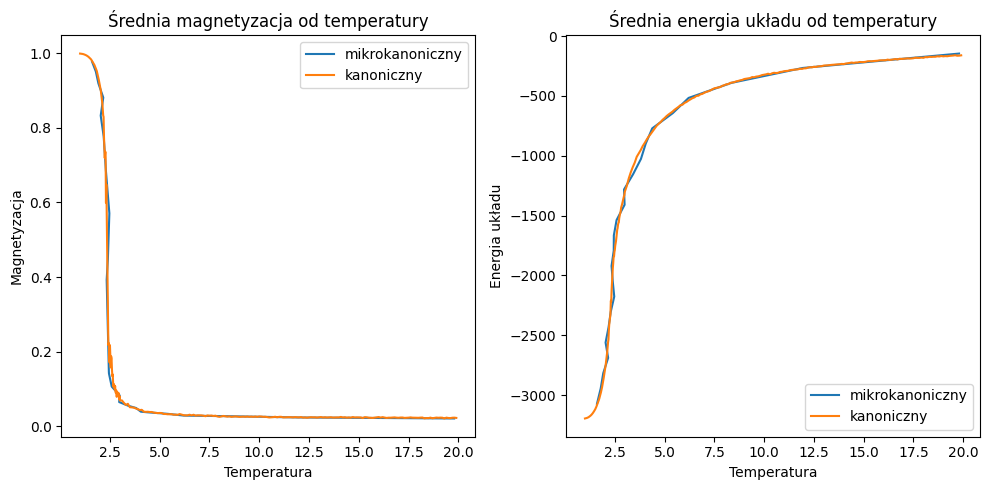

In [6]:
compare_from_files("./zad1_1.txt", "./zad2_1.txt")
compare_from_files("./zad1_2.txt", "./zad2_2.txt")
compare_from_files("./zad1_3.txt", "./zad2_3.txt")

Ogólnie wykresy są do siebie bardzo zbliżone, w szczególności końcówki średniej magnetyzacji. Bardziej widnoczne są różnice pomiędzy srednimi energiami, co zaprewne wynika z różnych inicjalizacji układów. W mikrokanonicznym podajemy energię a w kanonicznym temperaturę.